# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama:Reditya Imanuel Yuwono
- Email: doeng2@gmail.com
- Id Dicoding:reditya

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
warnings.filterwarnings('ignore')

### Menyiapkan data yang akan digunakan

In [2]:
# Memuat data 
df = pd.read_csv('data.csv', sep=';')

# Menampilkan 5 baris pertama
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [3]:
# Mengecek informasi dasar (Tipe data & Non-null count)
print("--- Info Dataset ---")
df.info()
print("\n")

# Mengecek dimensi data
print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")
print("\n")

# Mengecek data duplikat
print(f"Jumlah Data Duplikat: {df.duplicated().sum()}")
print("\n")

# Mengecek Missing Values
print("--- Jumlah Missing Values per Kolom ---")
print(df.isnull().sum())
print("\n")

# Melihat Statistik Deskriptif (Numerik)
print("--- Statistik Deskriptif (Numerik) ---")
display(df.describe())

--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualificati

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### EDA

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


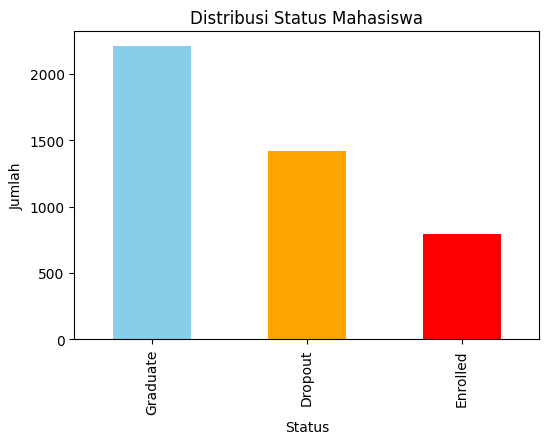

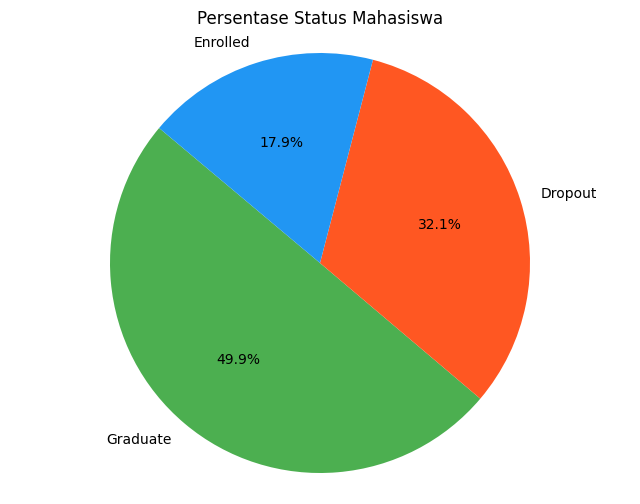

In [4]:
target_counts = df['Target'].value_counts()
print(target_counts)

# Visualisasi
plt.figure(figsize=(6, 4))
target_counts.plot(kind='bar', color=['skyblue', 'orange', 'red'])
plt.title('Distribusi Status Mahasiswa')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.show()

# Menghitung persentase
status_counts = df['Target'].value_counts()
colors = ['#4CAF50', '#FF5722', '#2196F3'] # Hijau (Lulus), Merah (DO), Biru (Aktif)

plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Persentase Status Mahasiswa')
plt.axis('equal')
plt.show()

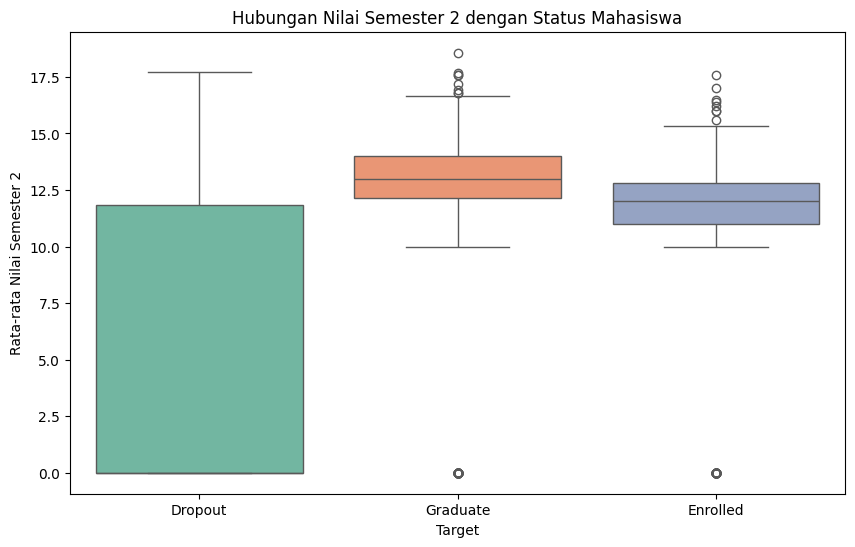

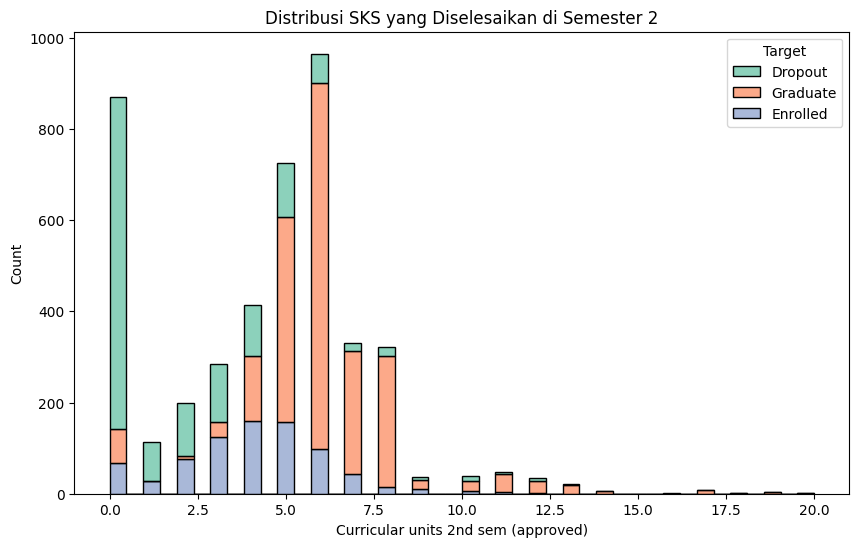

In [5]:
# Boxplot untuk melihat sebaran nilai berdasarkan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Curricular units 2nd sem (grade)', data=df, palette='Set2')
plt.title('Hubungan Nilai Semester 2 dengan Status Mahasiswa')
plt.ylabel('Rata-rata Nilai Semester 2')
plt.xlabel('Target')
plt.show()

# Histogram untuk SKS yang diselesaikan (Approved)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Curricular units 2nd sem (approved)', hue='Target', multiple='stack', palette='Set2')
plt.title('Distribusi SKS yang Diselesaikan di Semester 2')
plt.show()

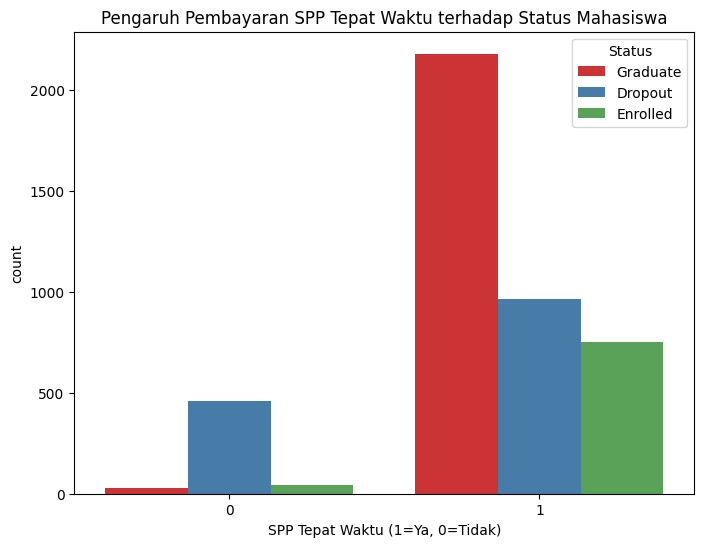

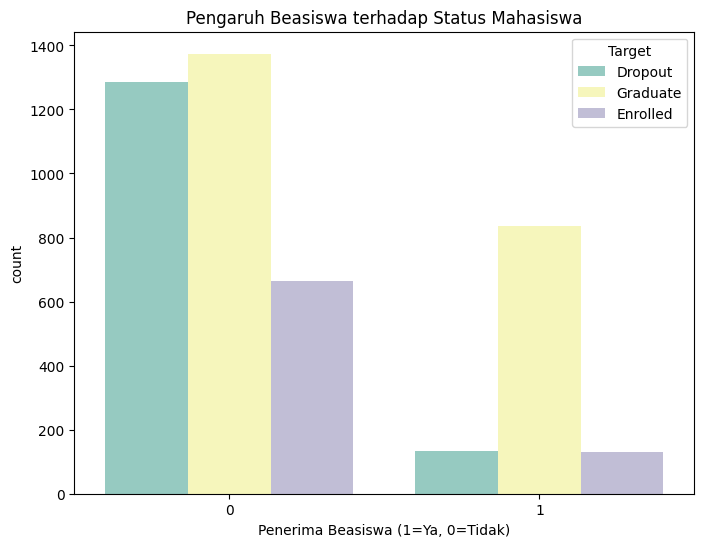

In [6]:
# Hubungan Status Pembayaran SPP dengan Status Mahasiswa
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Tuition fees up to date', hue='Target', palette='Set1')
plt.title('Pengaruh Pembayaran SPP Tepat Waktu terhadap Status Mahasiswa')
plt.xlabel('SPP Tepat Waktu (1=Ya, 0=Tidak)')
plt.legend(title='Status')
plt.show()

# Hubungan Penerima Beasiswa dengan Status Mahasiswa
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Scholarship holder', hue='Target', palette='Set3')
plt.title('Pengaruh Beasiswa terhadap Status Mahasiswa')
plt.xlabel('Penerima Beasiswa (1=Ya, 0=Tidak)')
plt.show()

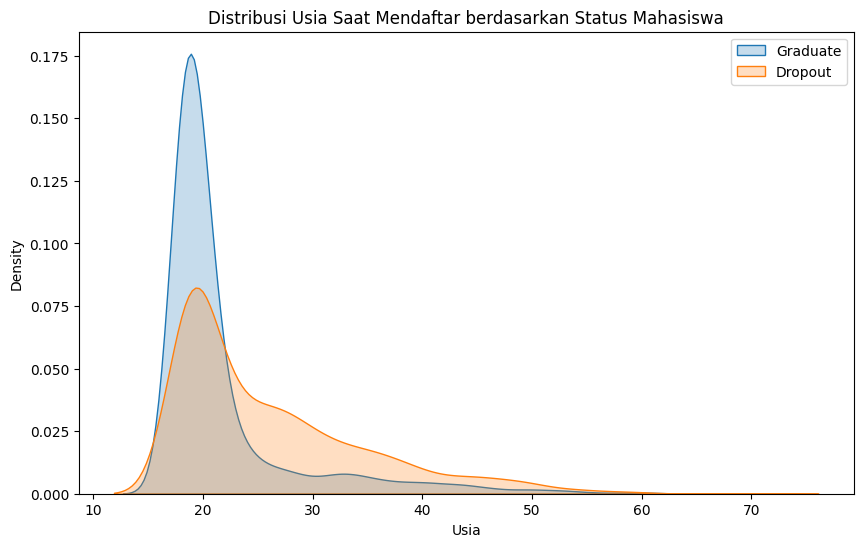

In [7]:
# Hubungan Usia dengan Status Mahasiswa
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Target'] == 'Graduate']['Age at enrollment'], label='Graduate', shade=True)
sns.kdeplot(data=df[df['Target'] == 'Dropout']['Age at enrollment'], label='Dropout', shade=True)
plt.title('Distribusi Usia Saat Mendaftar berdasarkan Status Mahasiswa')
plt.xlabel('Usia')
plt.legend()
plt.show()

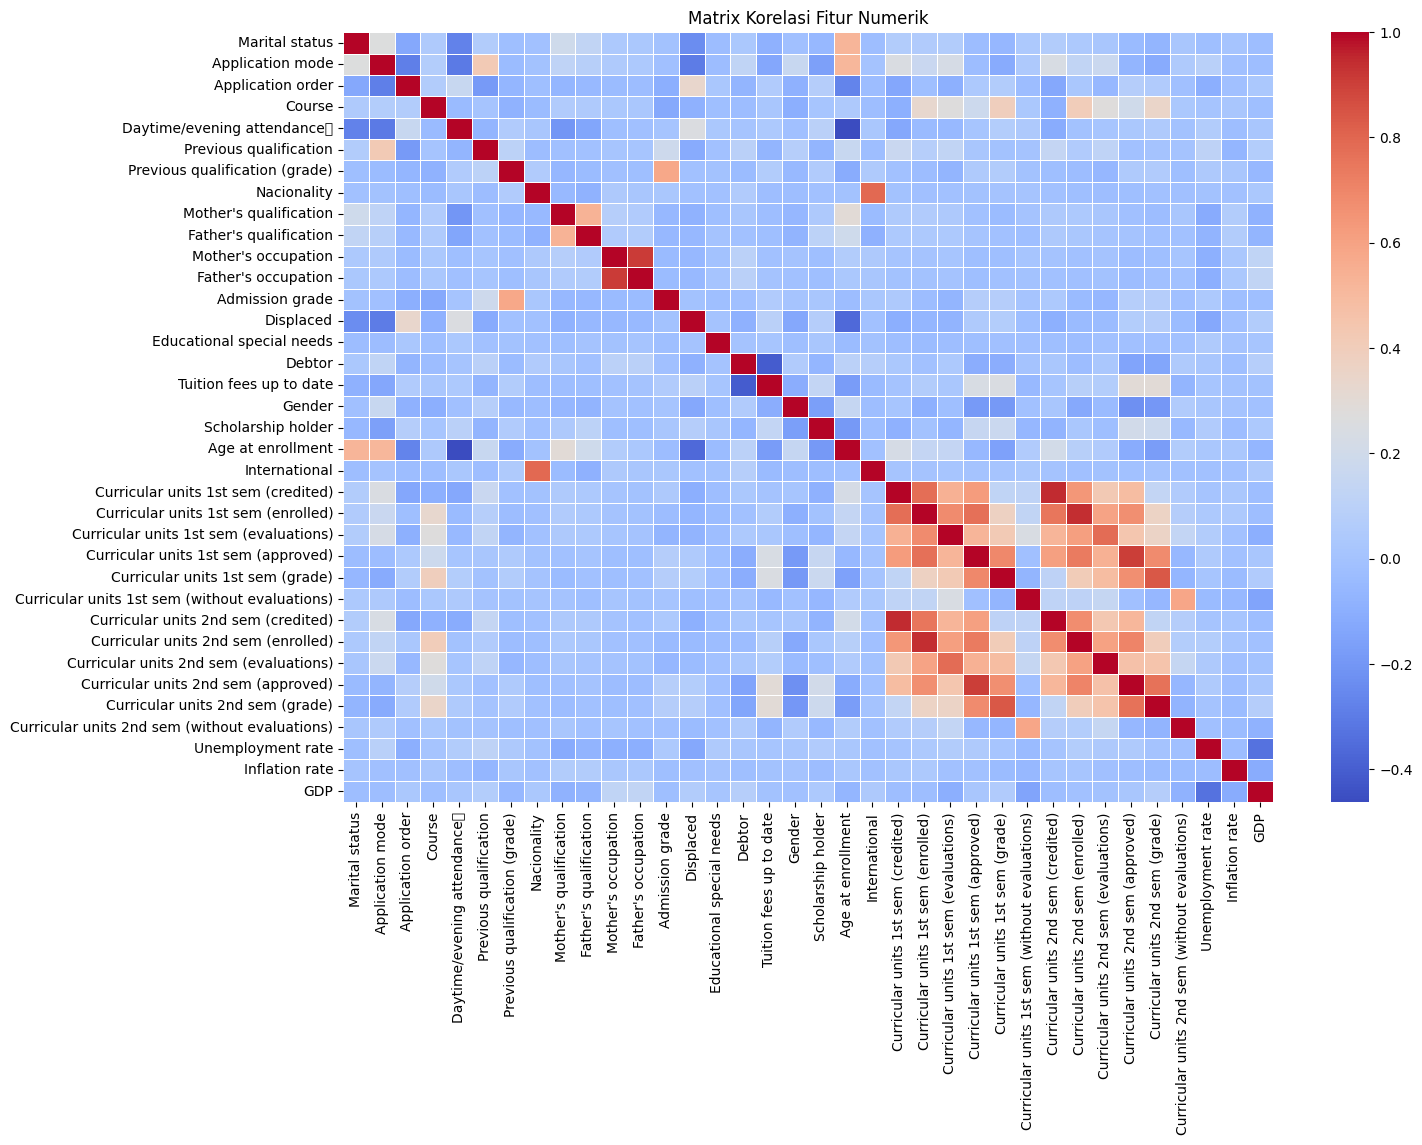

In [8]:
# Korelasi Antar Fitur Numerik
numerical_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(15, 10))
sns.heatmap(df[numerical_cols].corr(), cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Matrix Korelasi Fitur Numerik')
plt.show()

## Data Preparation / Preprocessing

In [9]:
# Filter hanya mengambil status Dropout dan Graduate
df_clean = df[df['Target'] != 'Enrolled'].copy()

# Pisahkan Fitur (X) dan Target (y)
X = df_clean.drop('Target', axis=1)
y = df_clean['Target']

# Encode Target
# Dropout = 0, Graduate = 1
le = LabelEncoder()
y = le.fit_transform(y)

print("Jumlah data siap latih:", len(df_clean))
print("Mapping Label:", dict(zip(le.classes_, le.transform(le.classes_))))

Jumlah data siap latih: 3630
Mapping Label: {'Dropout': np.int64(0), 'Graduate': np.int64(1)}


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data train: {X_train.shape[0]}")
print(f"Jumlah data test: {X_test.shape[0]}")

Jumlah data train: 2904
Jumlah data test: 726


## Modeling

In [11]:
# Inisialisasi Model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih Model (Ini proses "belajar")
model.fit(X_train, y_train)

# Prediksi data test
y_pred = model.predict(X_test)

In [12]:
# Simpan model ke file
joblib.dump(model, 'model/model.joblib')
df_clean.to_csv('data_clean.csv', index=False)

# Simpan urutan kolom ke file agar tidak tertukar di aplikasi
columns = list(X.columns)
with open('model/model_columns.json', 'w') as f:
    json.dump(columns, f)

print("Daftar kolom berhasil disimpan!")

print("Model berhasil disimpan di folder 'model/'")

Daftar kolom berhasil disimpan!
Model berhasil disimpan di folder 'model/'


## Evaluation

Akurasi Model: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       277
           1       0.90      0.95      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726



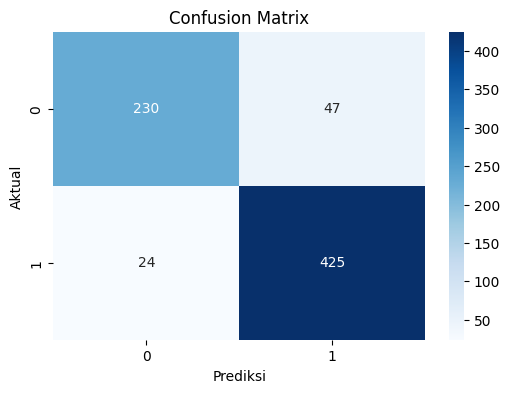

Top 10 Fitur Paling Berpengaruh:
                                   Feature  Importance
30     Curricular units 2nd sem (approved)    0.202566
31        Curricular units 2nd sem (grade)    0.156011
24     Curricular units 1st sem (approved)    0.116465
25        Curricular units 1st sem (grade)    0.059589
16                 Tuition fees up to date    0.059582
19                       Age at enrollment    0.033346
29  Curricular units 2nd sem (evaluations)    0.030705
12                         Admission grade    0.029018
3                                   Course    0.025802
6           Previous qualification (grade)    0.025027


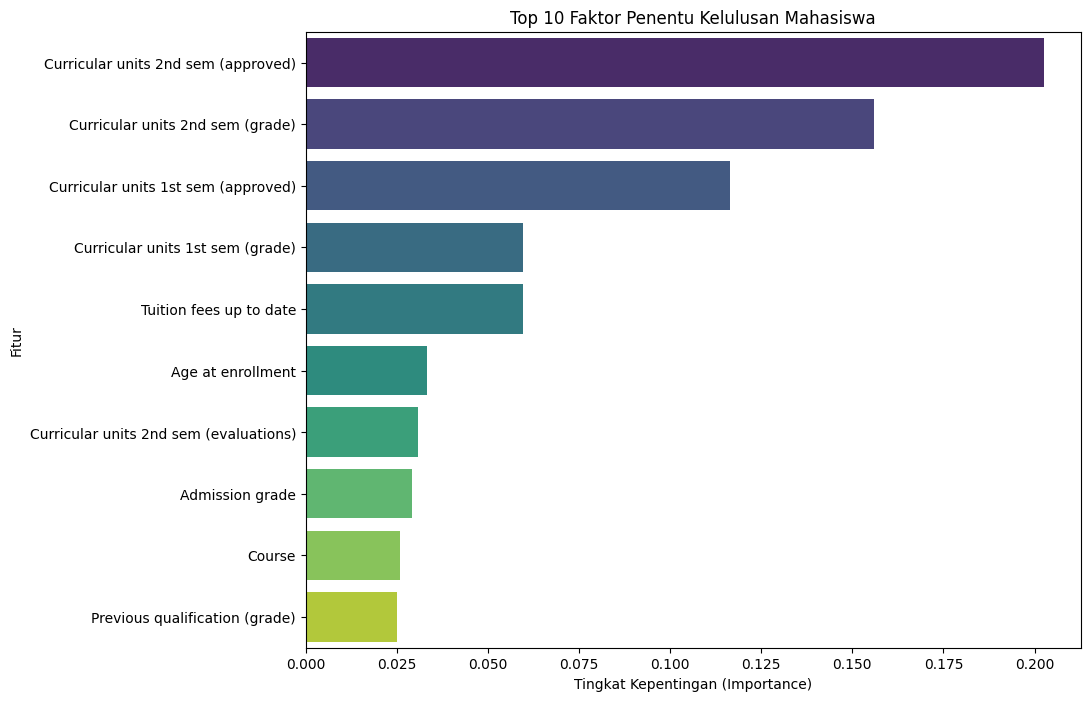

In [13]:
# Cek Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.2f}")

# Tampilkan detail performa (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualisasi Confusion Matrix (Benar vs Salah Tebak)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Mengambil data importance dari model
importances = model.feature_importances_
feature_names = X.columns

# Buat dataframe agar mudah dibaca
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Tampilkan 10 Fitur Teratas
print("Top 10 Fitur Paling Berpengaruh:")
print(feature_importance_df.head(10))

# Visualisasi Bar Chart
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Faktor Penentu Kelulusan Mahasiswa')
plt.xlabel('Tingkat Kepentingan (Importance)')
plt.ylabel('Fitur')
plt.show()